In [1]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls

In [3]:
countryList = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
countries = CountryMetaDataFile().readMetadata().loc[countryList]
start_date = '1980-01'


##Bespoke code name dictionaries
MSCIEquityDictionary = {
                        'US':'MSUSAML',
                        'AU':'MSAUSTL',
                        'JP':'MSJPANL',
                        'CN':'MSCNDAL',
                        'SW':'MSSWITL',
                        'UK':'MSUTDKL',
                        'ES':'MSSPANL',
                        'FR':'MSFRNCL',
                        'IT':'MSITALL',
                        'BD':'MSGERML'
}

dl = DataLib("SignalData")
dsPuller = DatastreamPulls(countries)


In [7]:
bondReturnIdx_locFX = dsPuller.ds_country_pull(lambda x: f'BM{x}10Y', start_date, 'RI', 'D')
bondReturnIdx_locFX.head()

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
1980-01-01,NaN,49.321,NaN,NaN,NaN,NaN,NaN,NaN,26.143,37.527
1980-01-02,NaN,49.330,NaN,NaN,NaN,NaN,NaN,NaN,25.882,37.156
1980-01-03,NaN,49.163,NaN,NaN,NaN,NaN,NaN,NaN,25.911,36.941
1980-01-04,NaN,49.116,NaN,NaN,NaN,NaN,NaN,NaN,26.123,36.859
1980-01-07,NaN,49.125,NaN,NaN,NaN,NaN,NaN,NaN,26.268,36.926


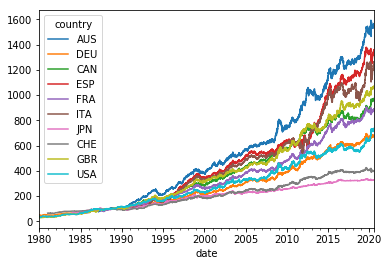

In [15]:
bondReturnIdx_locFX.plot()
plt.show()


In [8]:
dl.write_data("BondRetIdx/LocalFX",bondReturnIdx_locFX.to_timestamp())
test = dl.pull("BondRetIdx/LocalFX")
test.head()

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
1980-01-01,NaN,49.321,NaN,NaN,NaN,NaN,NaN,NaN,26.143,37.527
1980-01-02,NaN,49.330,NaN,NaN,NaN,NaN,NaN,NaN,25.882,37.156
1980-01-03,NaN,49.163,NaN,NaN,NaN,NaN,NaN,NaN,25.911,36.941
1980-01-04,NaN,49.116,NaN,NaN,NaN,NaN,NaN,NaN,26.123,36.859
1980-01-07,NaN,49.125,NaN,NaN,NaN,NaN,NaN,NaN,26.268,36.926


In [9]:
longRates = dsPuller.ds_country_pull(lambda x: f'TR{x}10T', start_date, 'RY', 'M')



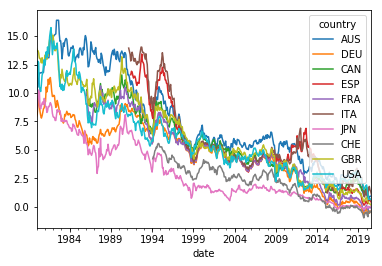

In [10]:
longRates.plot()
plt.show()



In [16]:
dl.write_data("LongRates",longRates.to_timestamp())


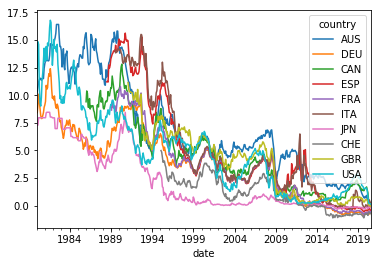

In [17]:
shortRates = dsPuller.ds_country_pull(lambda x: f'TR{x}2YT', start_date, 'RY', 'M')
shortRates.plot()
plt.show()
dl.write_data("ShortRates", shortRates.to_timestamp())



In [ ]:
equityPrices = dsPuller.ds_country_pull(lambda x: MSCIEquityDictionary[x], start_date, 'MSPI', 'D')
equityPrices.plot()
plt.show()
dl.write_data("EquityPrices", equityPrices.to_timestamp())






In [ ]:
M2_usd = dsPuller.ds_country_pull(lambda x: f'{x}CMS2..B', start_date, '', 'M',list(filter(lambda x: x !='AUS', countryList)))
M2_usd.plot()
plt.show()
dl.write_data("M2/inUSD", M2_usd.to_timestamp())



M1_usd = dsPuller.ds_country_pull(lambda x: f'{x}CMS1..B', start_date, '', 'M',['AUS'])
M1_usd.plot()
plt.show()
dl.write_data("M1/inUSD", M1_usd.to_timestamp())

M3_usd = dsPuller.ds_country_pull(lambda x: f'{x}CMS3..B', start_date, '', 'M',['AUS'])
M3_usd.plot()
plt.show()
dl.write_data("M3/inUSD", M3_usd.to_timestamp())





In [ ]:
currentAccountNominal_usd = dsPuller.ds_country_pull(lambda x: f'{x}CCUR..B', start_date, '', 'M')
currentAccountNominal_usd.plot()
plt.show()
dl.write_data("CurrAcctNom/inUSD", currentAccountNominal_usd.to_timestamp())



In [ ]:
currentAccount_pctGDP = dsPuller.ds_country_pull(lambda x: f'{x}CCUR..Q', start_date, '', 'M')
currentAccount_pctGDP.plot()
plt.show()
dl.write_data("CurrAcctPctGDP", currentAccount_pctGDP.to_timestamp())



In [ ]:
gdpNominal_usd = dsPuller.ds_country_pull(lambda x: f'{x}CGDP..A', start_date, '', 'M')
gdpNominal_usd.plot()
plt.show()
dl.write_data("GDP/Nominal", gdpNominal_usd.to_timestamp())



In [ ]:
gdpReal = dsPuller.ds_country_pull(lambda x: f'{x}CGDP..D', start_date, '', 'M')
gdpReal.plot()
plt.show()
dl.write_data("GDP/Real", gdpReal.to_timestamp())


In [ ]:
fxNomPrices_TrdWts = dsPuller.ds_country_pull(lambda x: f'{x}CXTW..F', start_date, '', 'M',['USA', 'AUS', 'JPN', 'CHE', 'GBR'])
fxNomPrices_TrdWts.plot()
plt.show()
dl.write_data("fxTrdWts/Nominal", fxNomPrices_TrdWts.to_timestamp())




In [ ]:
fxRealPrices_TrdWts = dsPuller.ds_country_pull(lambda x: f'{x}CXTR..F', start_date, '', 'M',['USA', 'AUS', 'JPN', 'CHE', 'GBR'])
fxRealPrices_TrdWts.plot()
plt.show()
dl.write_data("fxTrdWts/Real", fxRealPrices_TrdWts.to_timestamp())





In [ ]:
fxVsUSD = dsPuller.ds_country_pull(lambda x: f'{x}XRUSD.', start_date, '', 'M')
fxVsUSD.plot()
plt.show()
dl.write_data("fxVsUSD", fxVsUSD.to_timestamp())




In [ ]:
coreCPI_SA = dsPuller.ds_country_pull(lambda x: f'{x}CCOR..E', start_date, '', 'M')
coreCPI_SA.plot()
plt.show()
dl.write_data("CoreCPI/SA", coreCPI_SA.to_timestamp())




